<a href="https://colab.research.google.com/github/petroniocandido/STPE/blob/main/S%C3%A9ries_Temporais_e_Processos_Estoc%C3%A1sticos_Distribui%C3%A7%C3%B5es_de_Probabilidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Distribuições de Probabilidade
**Disciplina:** Tópicos Especiais - Séries Temporais e Processos Estocásticos

**Professor:** <a href="http://petroniocandido.github.io"> Petrônio Cândido de Lima e Silva</a> <span itemscope itemtype="https://schema.org/Person"><a itemprop="sameAs" content="https://orcid.org/0000-0002-1202-2552" href="https://orcid.org/0000-0002-1202-2552" target="orcid.widget" rel="noopener noreferrer" style="vertical-align:top;"><img src="https://orcid.org/sites/default/files/images/orcid_16x16.png" style="width:1em;margin-right:.5em;" alt="ORCID iD icon"></a></span> (petronio.candido@ifnmg.edu.br)

[![made-with-python](https://img.shields.io/badge/Made%20with-Python-1f425f.svg)](https://www.python.org/)  [![made-with-latex](https://img.shields.io/badge/Made%20with-LaTeX-1f425f.svg)](https://www.latex-project.org/) [![ForTheBadge built-with-love](http://ForTheBadge.com/images/badges/built-with-love.svg)](https://GitHub.com/Naereen/) [![ForTheBadge built-with-science](http://ForTheBadge.com/images/badges/built-with-science.svg)](https://GitHub.com/Naereen/)




<center>
  <table><tr>
<td><a href="https://ppgmcs.com.br/"><img src="https://ppgmcs.com.br/wp-content/uploads/ppgmcs.png" alt="Programa de Pós-Graduação em Modelagem Computacional e Sistemas - PPGMCS/Unimontes" height="60" width="150"/></a></td> 

 <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>

<td><a href="#"><img src="https://avatars1.githubusercontent.com/u/54992196?s=400&u=4c96d4fc0560b6957233f1dd91a9560de4a054b2&v=4" alt="{cidic} - Grupo de Pesquisa em Ciência de Dados e Inteligência Computacional" width="100"/></a></td> 

 <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
  
<td>
   <a href="http://www.ifnmg.edu.br/"><img src="https://github.com/petroniocandido/PhdThesis/raw/master/figures/ifnmg.jpg" alt="IFNMG - Instituto Federal do Norte de Minas Gerais" width="100"/></a></td>
</tr>
</table>
</center>

[![licensebuttons by-nc-sa](https://licensebuttons.net/l/by-nc-sa/3.0/88x31.png)](https://creativecommons.org/licenses/by-nc-sa/4.0) 

In [ ]:
import numpy as np    
from scipy import stats
import matplotlib.pyplot as plt

## Distribuições Discretas

### Ensaio de Bernoulli 

$$\Omega = \{0, 1\}$$

$$X \sim Bernoulli(p)$$

\begin{equation}
P(X = k) = \left\{\begin{array}{ccc}
1 - p & Se & k = 0  \\
p & Se & k = 1 \end{array} \right.
\end{equation}

In [ ]:
def bernoulli(p, m = 1):
  #rand = Gerador de Números Aleatórios seguindo a Uniforme contínua
  # x ~ U(0,1)
  x = np.random.rand(m)  

  return [1 if r <= p else 0 for r in x]

Text(0, 0.5, 'Densidade')

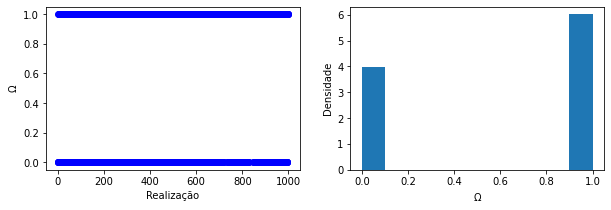

In [ ]:
n = 1000
X = bernoulli(.6, n)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[10,3])

ax[0].plot(X,'ob')
ax[0].set_xlabel("Realização")
ax[0].set_ylabel("$\Omega$")

hist_x = ax[1].hist(X, density=True)
ax[1].set_xlabel("$\Omega$")
ax[1].set_ylabel("Densidade")

### Distribuição Binomial

$$\Omega \in \mathbb{N}^+$$

$$X \sim Binomial(p, n)$$

$$X = \sum_{i=1}^n Y_i$$

$$Y_i \sim Bernoulli(p)$$

In [ ]:
def binomial(p, n, m = 1):
  ret = []
  for j in range(m):
    ret.append( np.sum(bernoulli(p,n)) )
  return ret


Text(0, 0.5, 'Densidade')

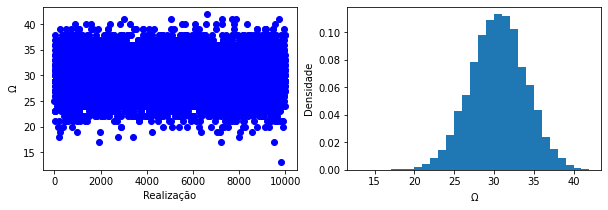

In [ ]:
m = 10000
X = binomial(.6, 50, m)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[10,3])

ax[0].plot(X,'ob')
ax[0].set_xlabel("Realização")
ax[0].set_ylabel("$\Omega$")

hist_x = ax[1].hist(X, bins=[k for k in range(min(X),max(X)+1)], density=True)
ax[1].set_xlabel("$\Omega$")
ax[1].set_ylabel("Densidade")

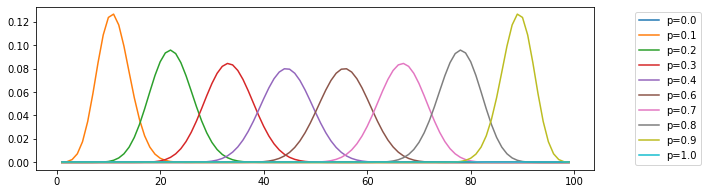

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[10,3])

for p in np.linspace(0, 1.0, 10):
  ax.plot(range(1,100,1), stats.binom.pmf(range(1,100,1), 100, p ), 
          label="p={}".format(round(p,1)))
plt.legend(bbox_to_anchor=(1, 0., 0.2, 1))

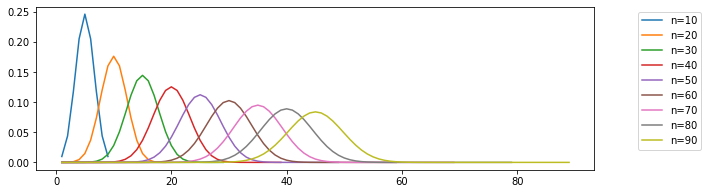

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[10,3])

for n in range(10, 100, 10):
  ax.plot(range(1,n,1), stats.binom.pmf(range(1,n,1), n, 0.5 ), 
          label="n={}".format(n))
plt.legend(bbox_to_anchor=(1, 0., 0.2, 1))

### Distribuição Geométrica

$$\Omega \in \mathbb{N}^+$$

$$X \sim Geo(p)$$

\begin{equation}
X = \arg\min_n \left( \sum_{i=1}^n Y_i = 1 \right)
\end{equation}

$$Y_i \sim Bernoulli(p)$$

In [ ]:
def geometrica(p, m = 1):
  ret = []
  for j in range(m):
    c = 0
    while not bernoulli(p,1)[0] == 1:
      c += 1
    ret.append( c )
  return ret


Text(0, 0.5, 'Densidade')

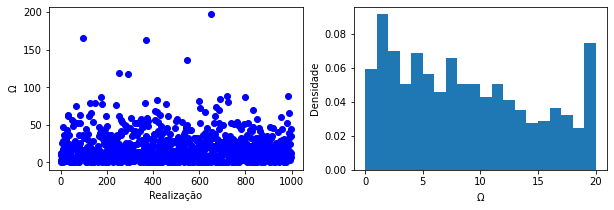

In [ ]:
n = 1000
X = geometrica(.05, n)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[10,3])

ax[0].plot(X,'ob')
ax[0].set_xlabel("Realização")
ax[0].set_ylabel("$\Omega$")

hist_x = ax[1].hist(X, bins=[k for k in range(0,21)], density=True)
ax[1].set_xlabel("$\Omega$")
ax[1].set_ylabel("Densidade")

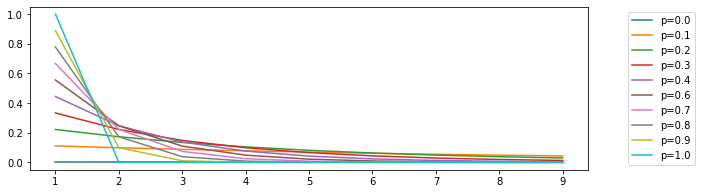

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[10,3])

for p in np.linspace(0, 1.0, 10):
  ax.plot(range(1,10,1), stats.geom.pmf(range(1,10,1), p ), 
          label="p={}".format(round(p,1)))
plt.legend(bbox_to_anchor=(1, 0., 0.2, 1))

### Distribuição de Poisson

$$\Omega \in \mathbb{N}^+$$
$$X \sim Poisson(\lambda)$$
$$X = \sum_{t=1}^n Y_t$$
$$Y_t \sim Bernoulli(p)$$
Onde:
* $\lambda$ é a taxa de ocorrência de eventos no intervalo de tempo (com $T$ unidades)
* $p=\lambda / T$ é a probabilidade da VAD $Y_t$
* $t=1..T$ representa cada unidade DISCRETA de tempo





In [ ]:
def poisson(l, T, m = 1):
  ret = []
  p = l/T
  for j in range(m):
    ret.append( np.sum(bernoulli(p,T)) )
  return ret

Text(0, 0.5, 'Densidade')

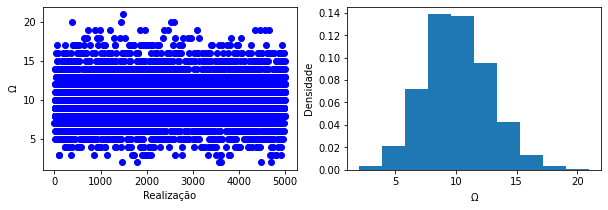

In [ ]:
l = 10  #10 ocorrências por hora
T = 60  # 60 minutos
X = poisson(l, T, 5000)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[10,3])

ax[0].plot(X,'ob')
ax[0].set_xlabel("Realização")
ax[0].set_ylabel("$\Omega$")

hist_x = ax[1].hist(X, density=True)
ax[1].set_xlabel("$\Omega$")
ax[1].set_ylabel("Densidade")

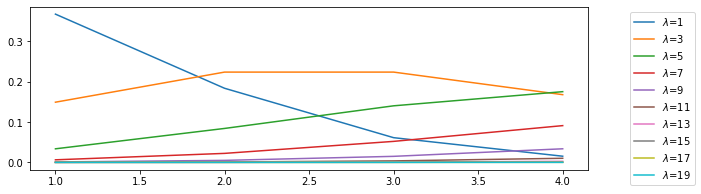

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[10,3])

for l in range(1, 20, 2):
  ax.plot(range(1,5,1), stats.poisson.pmf(range(1,5,1), l ), 
          label="$\lambda$={}".format(round(l,1)))
plt.legend(bbox_to_anchor=(1, 0., 0.2, 1))

## Distribuições Contínuas

### Distribuição Normal

$$\Omega \in \mathbb{R}$$

$$Y_i \sim \mathcal{U}(-a, a)$$

$$X = \sum_{i=1}^n Y_i$$

$$X \sim \mathcal{N}(\mu, \sigma^2)$$

In [ ]:
def normal(a, n, m):
  ret = []
  y = np.random.uniform(-a, a, m)
  for r in range(n-1):
    y += np.random.uniform(-a, a, m)
  return y

Text(0, 0.5, 'Densidade')

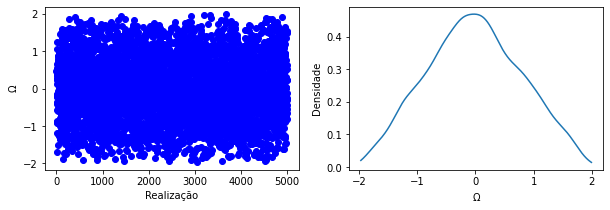

In [ ]:
n = 5000
X = normal(1, 2, n)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[10,3])

ax[0].plot(X,'ob')
ax[0].set_xlabel("Realização")
ax[0].set_ylabel("$\Omega$")

kde = stats.kde.gaussian_kde(X)
it = np.linspace(min(X), max(X), n)

ax[1].plot(it, kde(it))
ax[1].set_xlabel("$\Omega$")
ax[1].set_ylabel("Densidade")

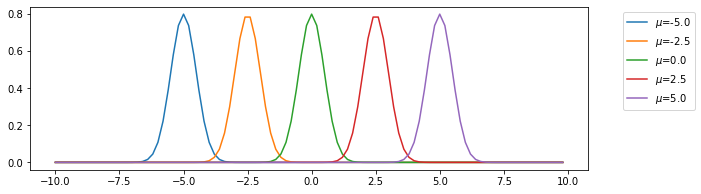

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[10,3])

for mu in np.linspace(-5.0, 5.0, 5):
  ax.plot(np.arange(-10,10,0.2), stats.norm.pdf(np.arange(-10,10,0.2), mu, 0.5 ), 
          label="$\mu$={}".format(round(mu,1)))
plt.legend(bbox_to_anchor=(1, 0., 0.2, 1))

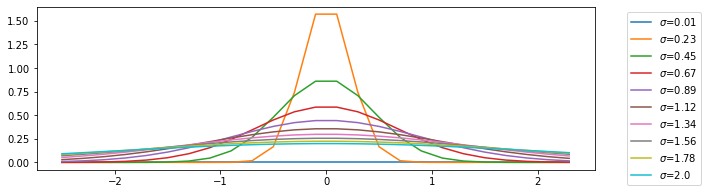

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[10,3])

for sigma in np.linspace(.01, 2.0, 10):
  ax.plot(np.arange(-2.5,2.5,0.2), stats.norm.pdf(np.arange(-2.5,2.5,0.2), 0, sigma ), 
          label="$\sigma$={}".format(round(sigma,2)))
plt.legend(bbox_to_anchor=(1, 0., 0.2, 1))

## Funções de Distribuição

$$\phi(\omega) = \sum_{x \in \Omega} e^{j\omega x}\cdot P(x)$$

In [ ]:
def phi(px):
  rads = np.linspace(-np.pi, np.pi, 100)
  ret = { w : np.sum([px[x] * np.exp(w*1j*x) for x in px.keys()]) for w in rads}
  return ret

def phi_plot(px, ax):
  fphi = phi(px)
  ax.plot([k for k in fphi.keys()], [k for k in fphi.values()])
  ax.set_xlabel("$\omega$")
  ax.set_ylabel("$\phi(\omega)$")


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


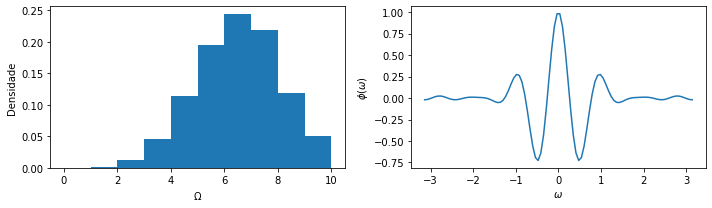

In [ ]:
X = binomial(.6, 10, 5000)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[10,3])

hist_x = ax[0].hist(X, density=True)
ax[0].set_xlabel("$\Omega$")
ax[0].set_ylabel("Densidade")

px = { hist_x[1][ct] : hist_x[0][ct] for ct in range(0,len(hist_x[0])) }
phi_plot(px, ax[1])

plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


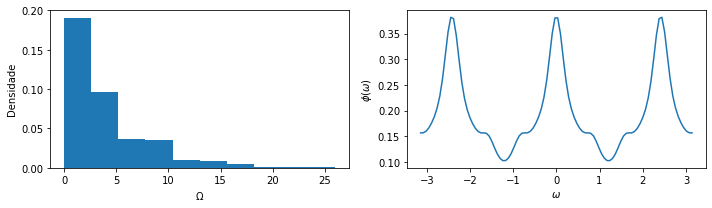

In [ ]:
X = geometrica(.2, 1000)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[10,3])

hist_x = ax[0].hist(X, density=True)
ax[0].set_xlabel("$\Omega$")
ax[0].set_ylabel("Densidade")

px = { hist_x[1][ct] : hist_x[0][ct] for ct in range(0,len(hist_x[0])) }
phi_plot(px, ax[1])

plt.tight_layout()

## Momentos

In [ ]:
def momento(px, n):
  ret = 0
  for x in px.keys():
    ret += (x ** n) * px[x]
  return ret

def momento_central(px, n):
  mu = momento(px, 1)
  ret = 0
  for x in px.keys():
    ret += (x - mu) ** n * px[x]
  return ret

def momento_normalizado(px, n):
  mu = momento(px, 1)
  sigma = momento_central(px, 2)
  ret = 0
  for x in px.keys():
    ret += ((x - mu)/sigma) ** n * px[x]
  return ret